In [1]:
import matplotlib.pyplot as plt
import numpy as np

from experiments.evaluation_flow.shared import GOOGLENET, RESNET_152, MOBILENET, RESNET_18, RESNET_50, PARAM_UPDATE, PARAM_UPDATE_IMPROVED, PROVENANCE
from experiments.plots.util import *

In [2]:
ROOT_LOG_DIR = '../evaluation_flow/evaluation-flow-results/results'
VERSION = 'version'
FINE_TUNED = 'fine-tuned'
OUTDOOR = 'outdoor'
FOOD = 'food'

In [3]:
# get all file sin the directory
all_files = all_files_in_dir(ROOT_LOG_DIR)
node_server_files = [f for f in all_files if 'server' in f or 'node' in f]
# for all files extract the metadata (e.g. what model and dataset is used)
U_IDS = 'u_ids'

files_and_meta = [(extract_file_meta(f), f) for f in node_server_files]
# add a mapping: use_case -> model id
files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in files_and_meta]
# add the parsed events
files_and_meta = [({**f[0], **{EVENTS: parse_events(f[1])}}, f[1]) for f in files_and_meta]

In [4]:
valid_joined = join_server_and_node_meta(files_and_meta)

In [5]:
times = extract_times(valid_joined)

In [6]:
def plot_median_detailed_save_times(data, save_path=None, y_min_max=None):
    x_labels = rearrange_u2(list(data.keys()))
    labels = ['save_time', 'save_dataset']

    transformed_data = []
    for u in x_labels:
        tmp = list(data[u].values())
        tmp[0] = tmp[0] - tmp[1]
        transformed_data.append(tmp)

    plot_data = np.array(transformed_data).T
    plot_detailed_times(plot_data, labels, x_labels, save_path, y_min_max=y_min_max)

In [7]:
def plot_median_detailed_recover_times(data, save_path=None, y_min_max=None):
    x_labels = rearrange_u2(list(data.keys()))
    labels = ['recover base model', 'load prov info', 'training', 'recover full model']

    transformed_data = []
    for u in x_labels:
        tmp = list(data[u].values())
        transformed_data.append(tmp)

    plot_data = np.array(transformed_data).T

    plot_detailed_times(plot_data, labels, x_labels, save_path, y_min_max=y_min_max)

In [8]:
# PROVENANCE APPROACH SAVE TIME

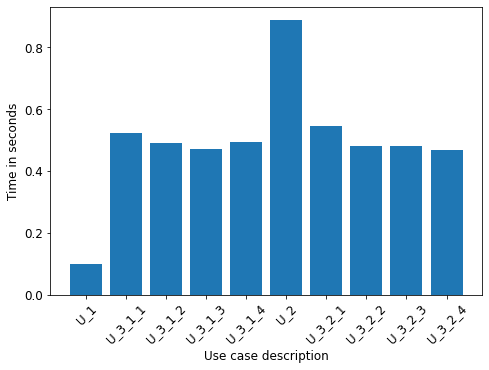

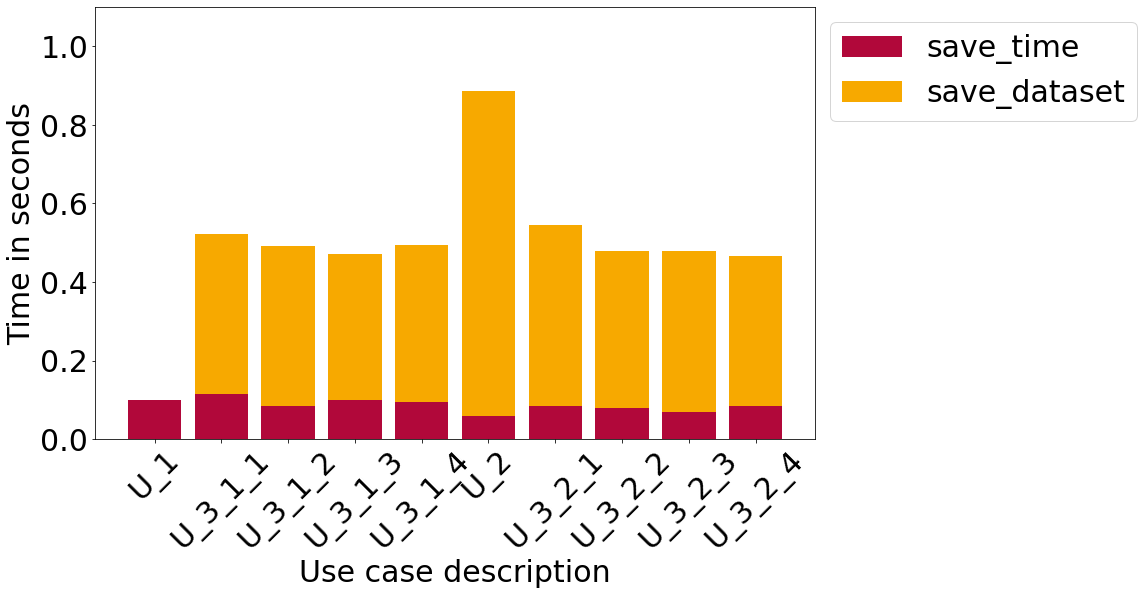

In [9]:
data = filter_meta(times, model=MOBILENET, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)
median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save, y_min_max=[0,1.1],
                                save_path='./saved-plots/provenance/mobilenet-save-time-version-food')

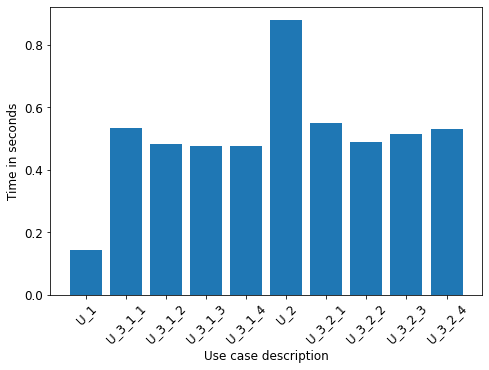

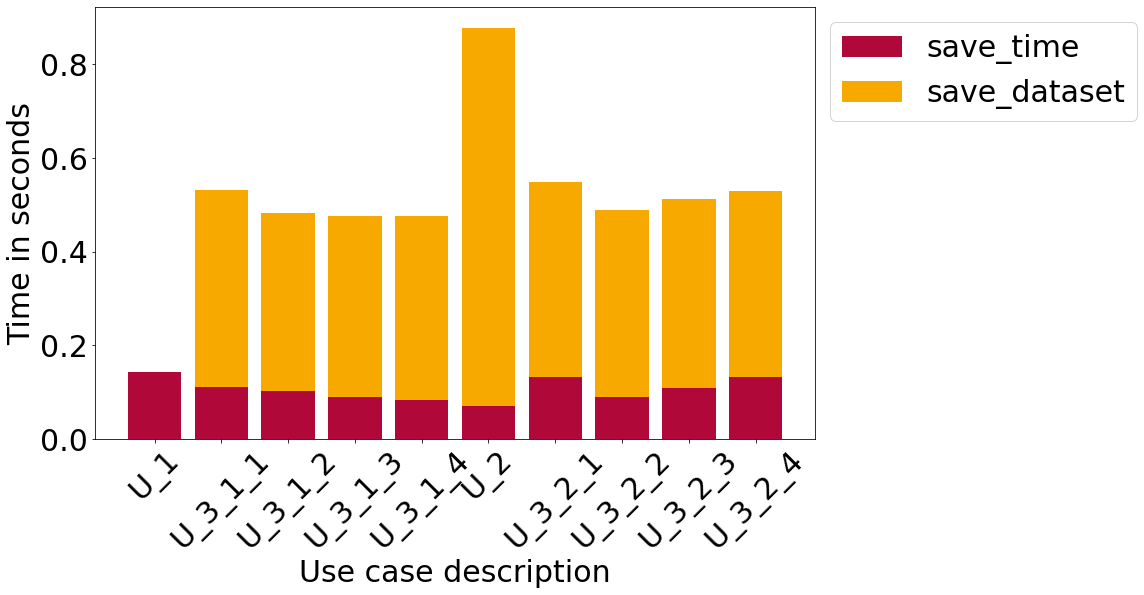

In [10]:
data = filter_meta(times, model=GOOGLENET, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)
median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

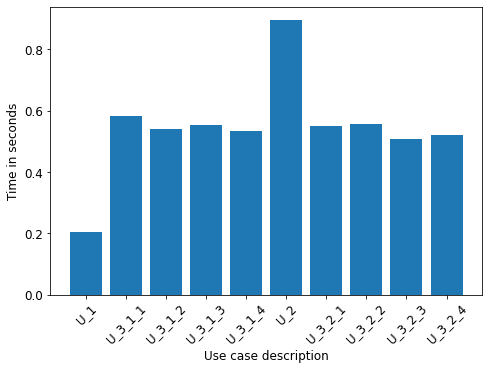

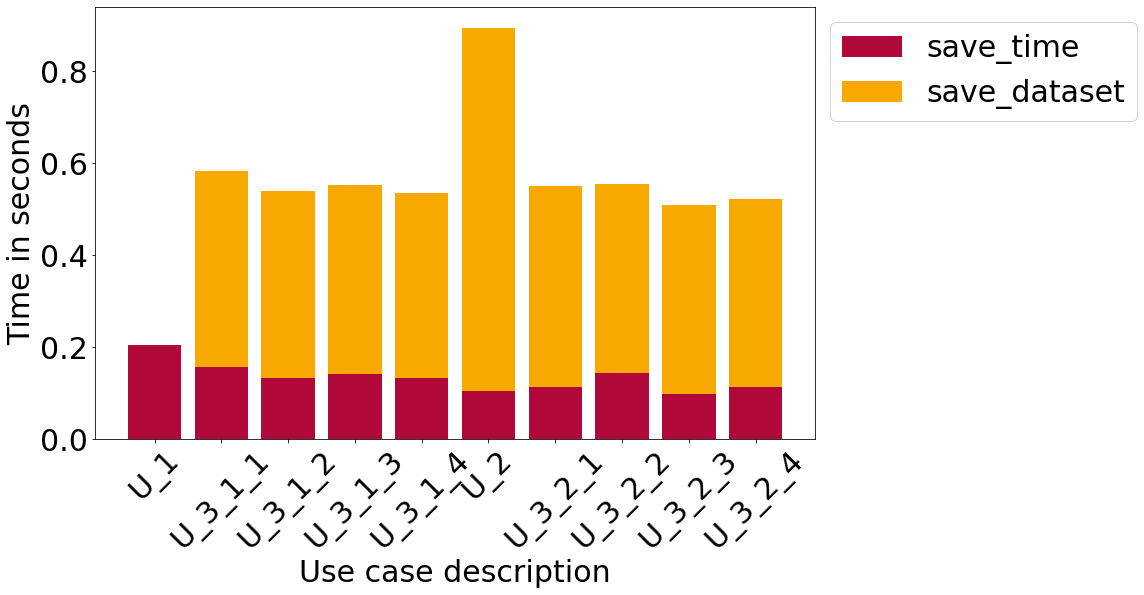

In [11]:
data = filter_meta(times, model=RESNET_18, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)
median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

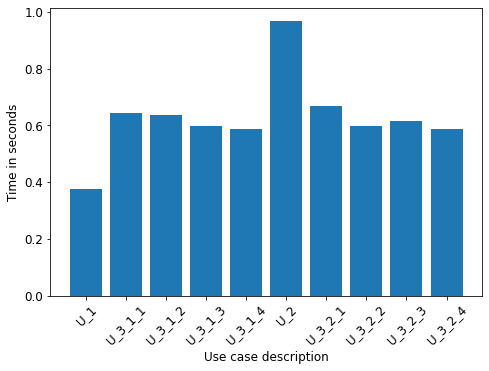

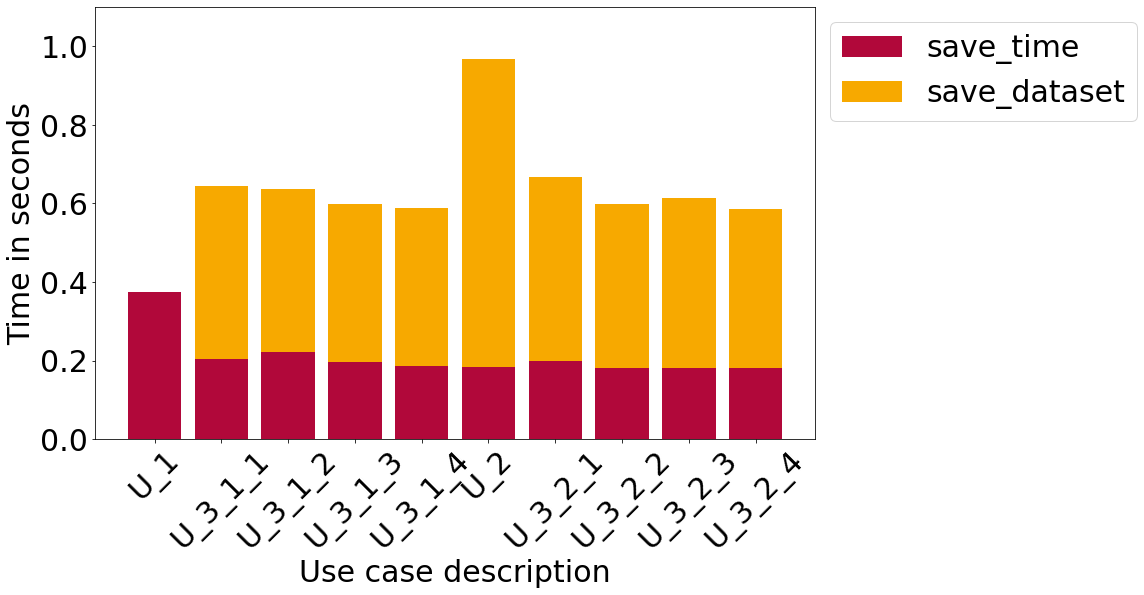

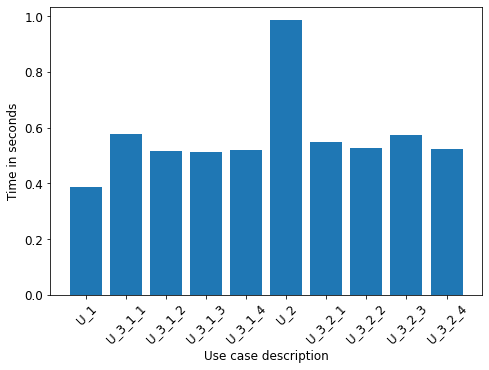

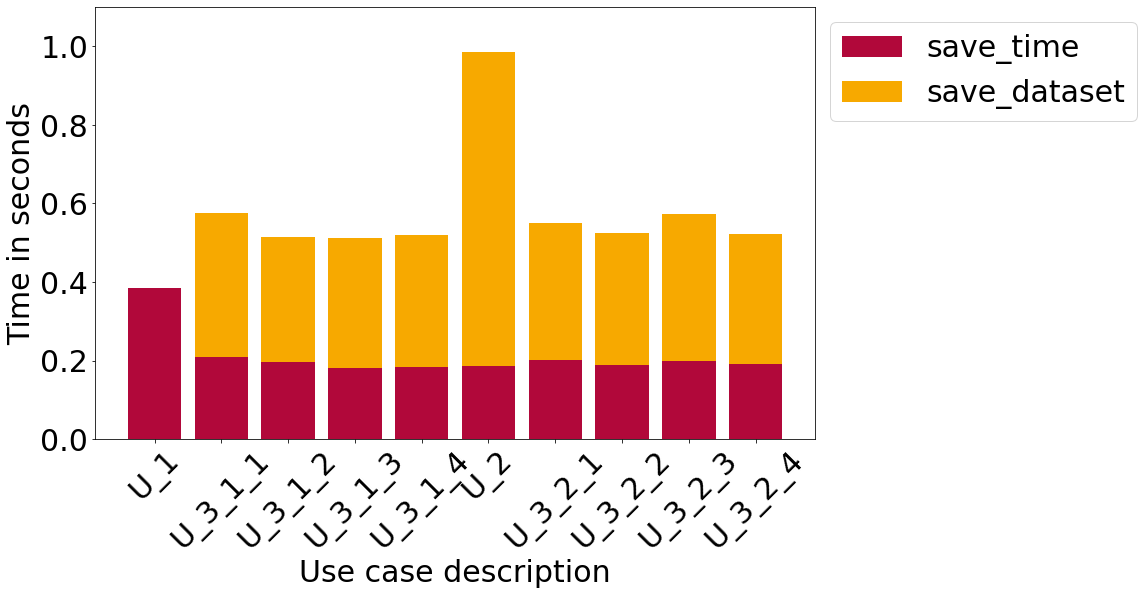

In [12]:
data = filter_meta(times, model=RESNET_50, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)
median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save, y_min_max=[0,1.1],
                                save_path='./saved-plots/provenance/resnet50-save-time-version-food')

data = filter_meta(times, model=RESNET_50, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)
median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save, y_min_max=[0,1.1],
                                save_path='./saved-plots/provenance/resnet50-save-time-version-outdoor')

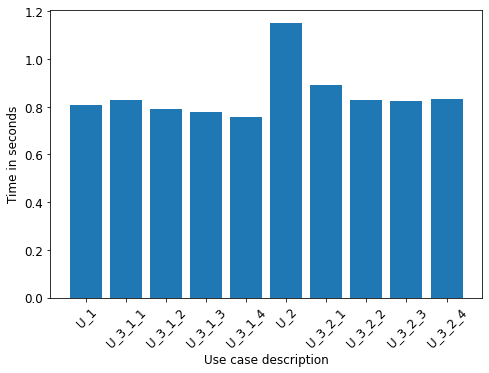

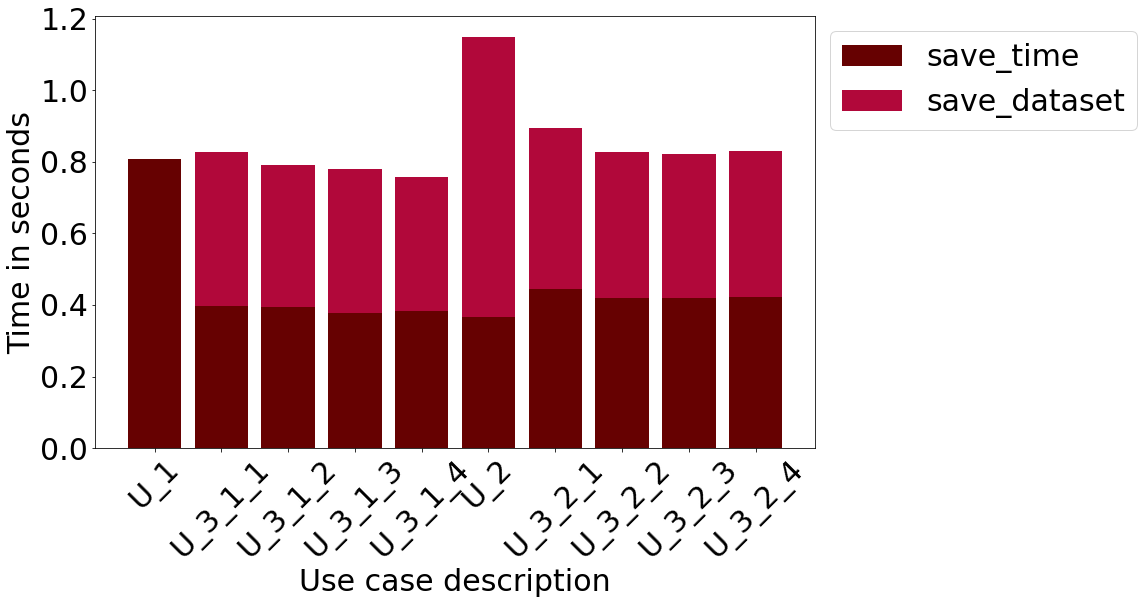

In [13]:
data = filter_meta(times, model=RESNET_152, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)
median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)
# COMPARE IMPACT OF DATASET

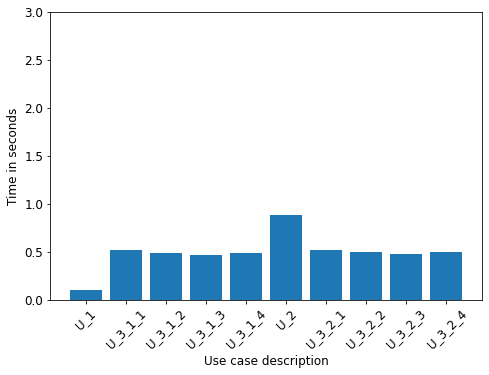

In [14]:
data = filter_meta(times, model=MOBILENET, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=FOOD)
plot_median_high_level_save_time(data, y_min_max=[0, 3],
                                 save_path='./saved-plots/comparisons/prov-mobilenet-save-time-finetuned-food')

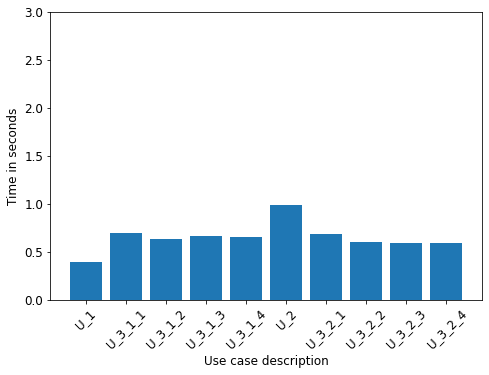

In [15]:
data = filter_meta(times, model=RESNET_50, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=FOOD)
plot_median_high_level_save_time(data, y_min_max=[0, 3],
                                 save_path='./saved-plots/comparisons/prov-resnet50-save-time-finetuned-food')

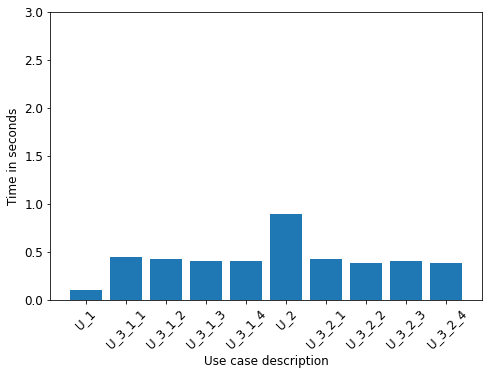

In [16]:
data = filter_meta(times, model=MOBILENET, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data, y_min_max=[0, 3],
                                 save_path='./saved-plots/comparisons/prov-mobilenet-save-time-finetuned-outdoor')

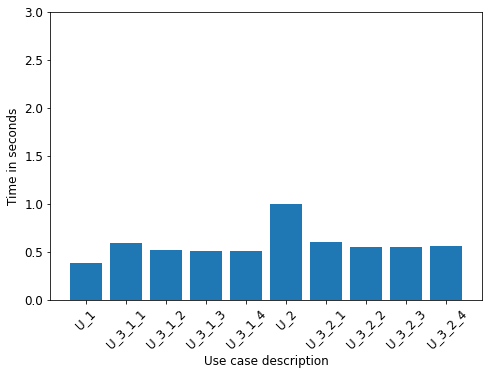

In [17]:
data = filter_meta(times, model=RESNET_50, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data, y_min_max=[0, 3],
                                 save_path='./saved-plots/comparisons/prov-resnet50-save-time-finetuned-outdoor')


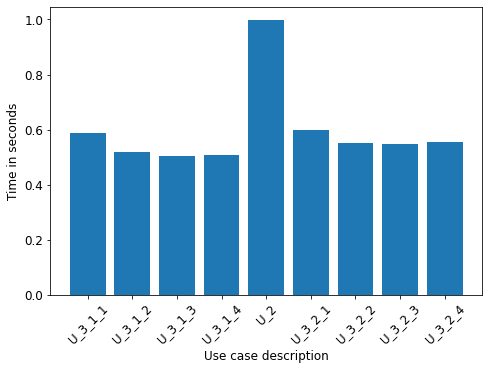

In [18]:
data = filter_meta(times, model=RESNET_50, approach=PROVENANCE, snapshot_type=FINE_TUNED, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data, save_path='./saved-plots/comparisons/prov-resnet50-save-time-finetuned-outdoor-withu2',
                                 ignore_use_cases=[U_1])

In [19]:
# PROVENANCE APPROACH RECOVER TIME

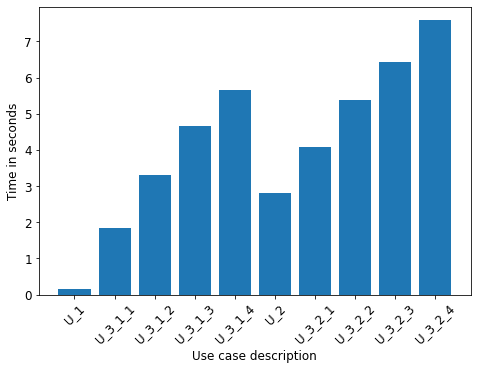

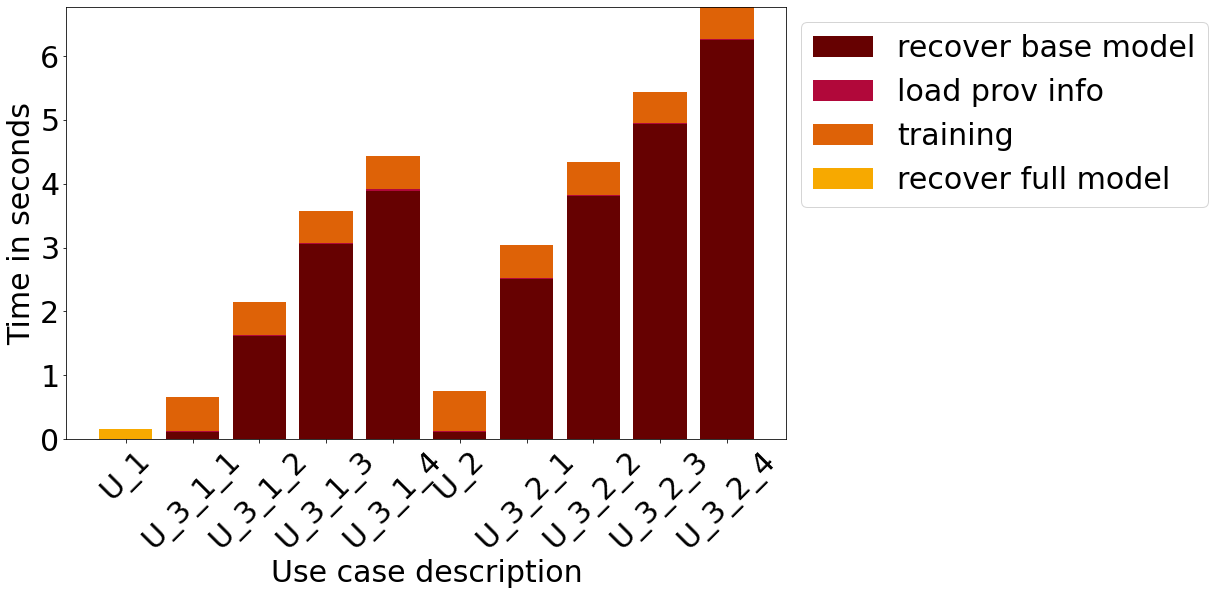

In [20]:
data = filter_meta(times, model=MOBILENET, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data, save_path='./saved-plots/provenance/mobilenet-recover-time-version-food')
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

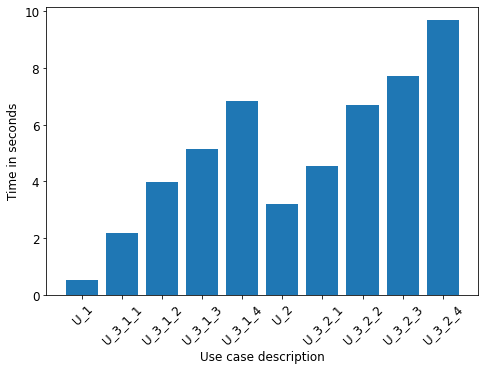

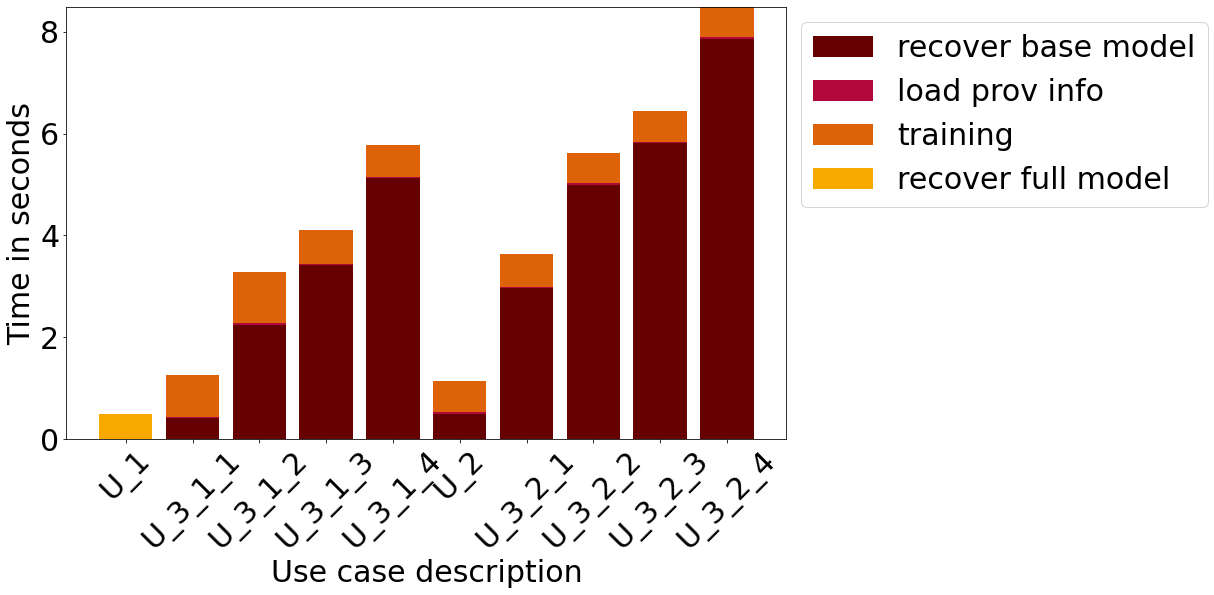

In [21]:
data = filter_meta(times, model=GOOGLENET, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data, save_path='./saved-plots/provenance/googlenet-recover-time-version-food')
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

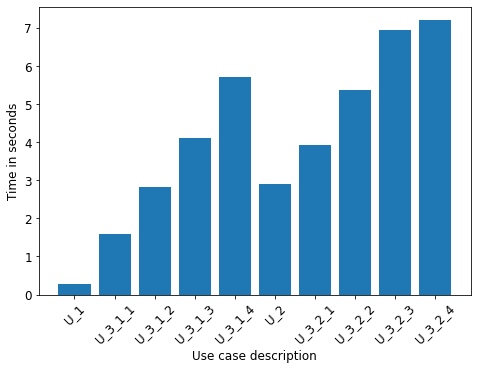

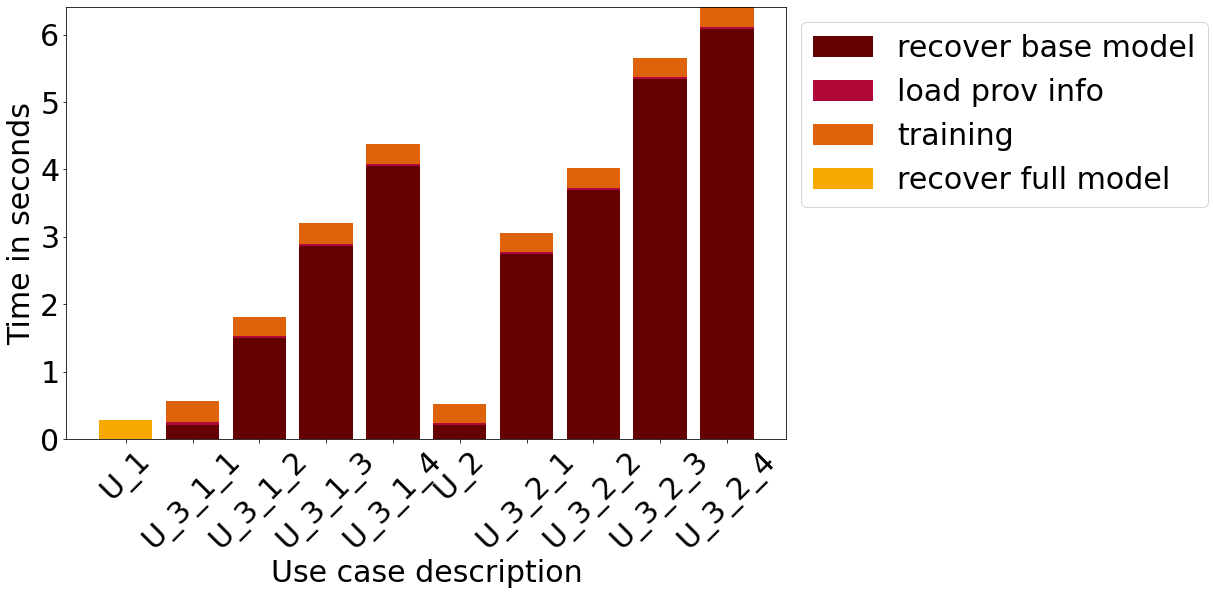

In [22]:
data = filter_meta(times, model=RESNET_18, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data, save_path='./saved-plots/provenance/resnet18-recover-time-version-food')
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

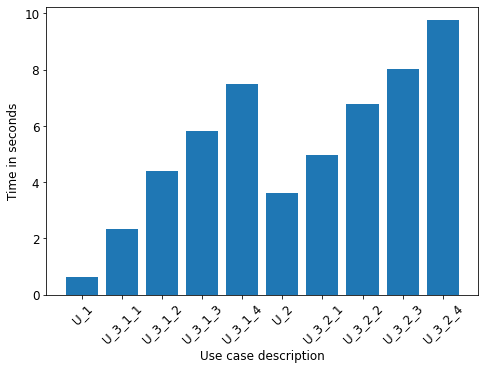

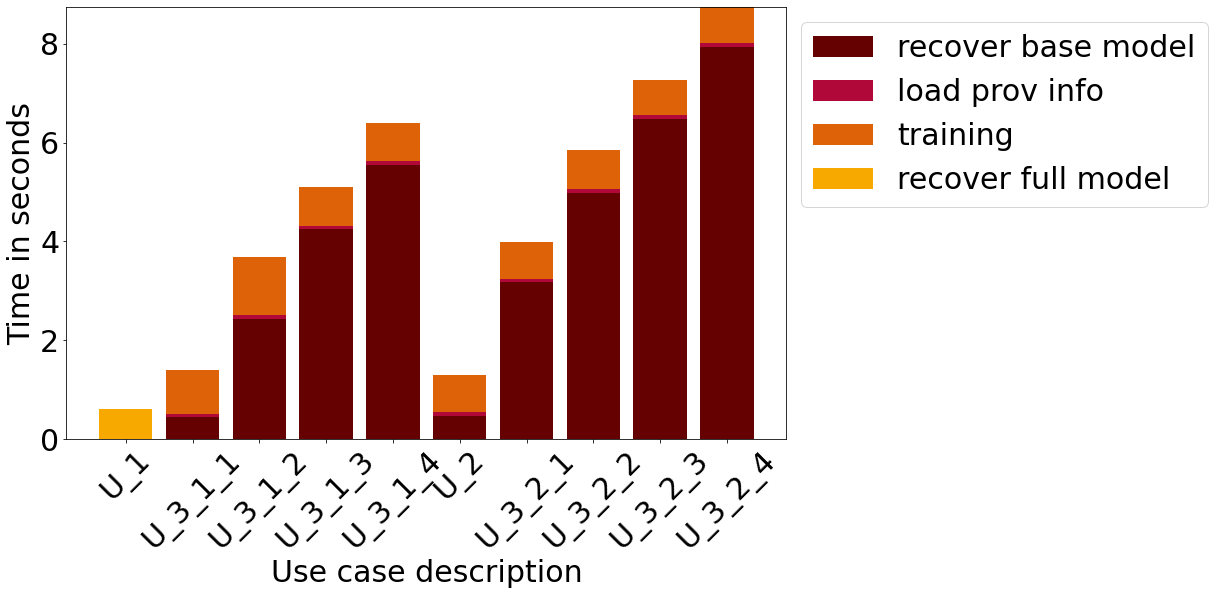

In [23]:
data = filter_meta(times, model=RESNET_50, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data, save_path='./saved-plots/provenance/resnet50-recover-time-version-food')
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

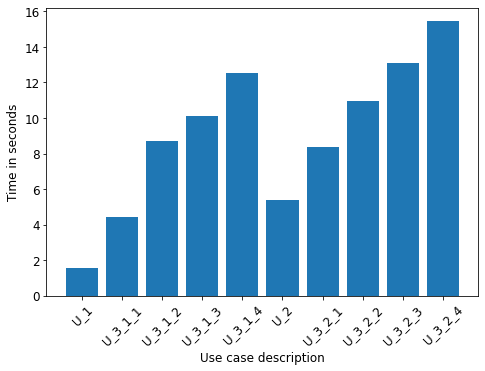

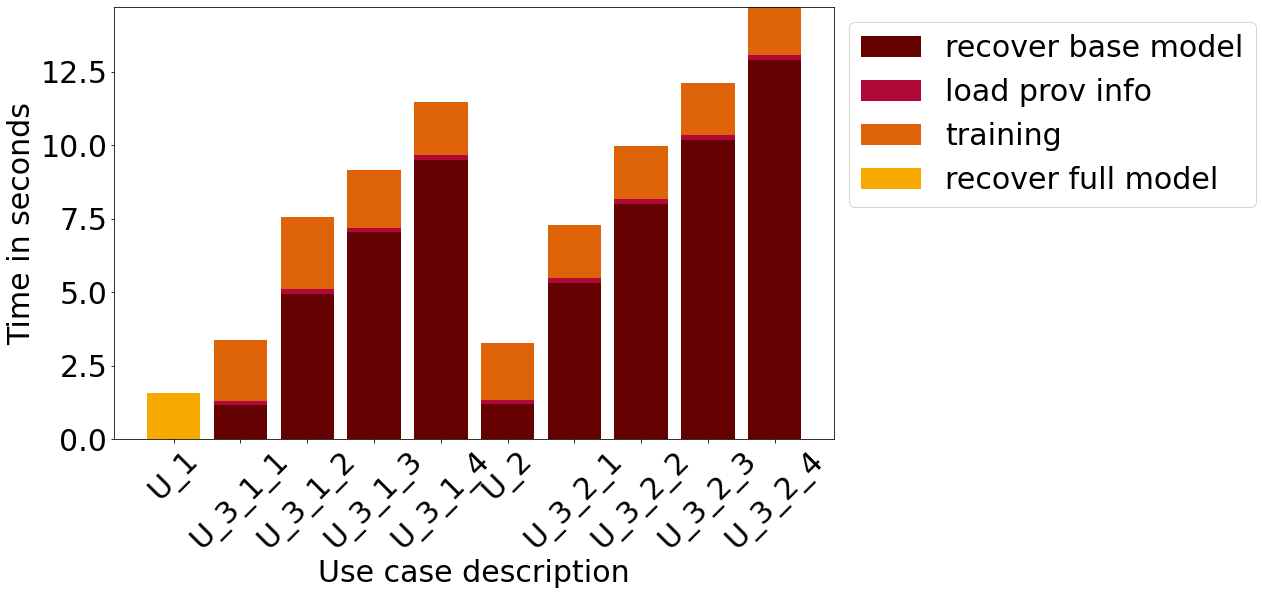

In [24]:
data = filter_meta(times, model=RESNET_152, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data, save_path='./saved-plots/provenance/resnet152-recover-time-version-food')
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)